In [1]:
import numpy as np
import os
import pandas as pd
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
# Confusion matrix generation
def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average = 'macro')
    recall = recall_score(y_test,pred, average = 'macro')
    f1 = f1_score(y_test, pred, average = 'macro')
    roc_auc = roc_auc_score(y_test, pred_proba, average = 'macro', multi_class='ovr')
    print('Confusion matrix')
    print(confusion)
    print('Accuracy:{0:.4f}, Precision:{1:.4f}, Recall:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 1. Load train and test data

In [4]:
train_data = pd.read_csv("data/train_data_PCA.csv", header=None)
test_data = pd.read_csv("data/test_data_PCA.csv", header=None)

X_train = train_data.iloc[:,:2]
y_train = train_data.iloc[:,2]

X_test = test_data.iloc[:,:2]
y_test = test_data.iloc[:,2]

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

### 2. Train the support vector machine (SVM) model

In [5]:
# Grid search for determining the best parameters
param = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svc_clf = SVC(kernel='rbf', probability=True)
grid_search = GridSearchCV(svc_clf, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [6]:
# Grid search scores
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'C': 0.001, 'gamma': 0.001}",0.705694,45,0.696528,0.709028,0.684028,0.725000,0.713889
1,"{'C': 0.001, 'gamma': 0.01}",0.733472,44,0.720833,0.731944,0.714583,0.750000,0.750000
2,"{'C': 0.001, 'gamma': 0.1}",0.800972,39,0.801389,0.801389,0.785417,0.807639,0.809028
3,"{'C': 0.001, 'gamma': 1}",0.860972,32,0.853472,0.865972,0.847917,0.872917,0.864583
4,"{'C': 0.001, 'gamma': 10}",0.844306,37,0.838194,0.847222,0.836111,0.850694,0.849306
5,"{'C': 0.001, 'gamma': 100}",0.762639,40,0.769444,0.771528,0.725000,0.774306,0.772917
6,"{'C': 0.001, 'gamma': 1000}",0.645278,48,0.668750,0.655556,0.588194,0.696528,0.617361
7,"{'C': 0.01, 'gamma': 0.001}",0.705694,45,0.696528,0.709028,0.684028,0.725000,0.713889
8,"{'C': 0.01, 'gamma': 0.01}",0.754722,42,0.748611,0.750000,0.734722,0.770833,0.769444
9,"{'C': 0.01, 'gamma': 0.1}",0.848889,35,0.843056,0.854167,0.842361,0.854167,0.850694


In [7]:
print("GridSearchCV optimal paramters:", grid_search.best_params_)
print("GridSearchCV the highest accuracy:{0:.4f}".format(grid_search.best_score_))

GridSearchCV optimal paramters: {'C': 1, 'gamma': 10}
GridSearchCV the highest accuracy:0.9149


### 3. Test the SVM model

In [8]:
estimator = grid_search.best_estimator_  # optimal SVM model 

preds = estimator.predict(X_test_scaled) # prediction results
pred_probs = estimator.predict_proba(X_test) 

In [9]:
get_clf_eval(y_test, preds, pred_probs) 

Confusion matrix
[[113   0  22  17]
 [  1 121  13   0]
 [  4   5 110   1]
 [  0   0   0 126]]
Accuracy:0.8818, Precision:0.8879, Recall:0.8891, F1:0.8819, AUC:0.5000


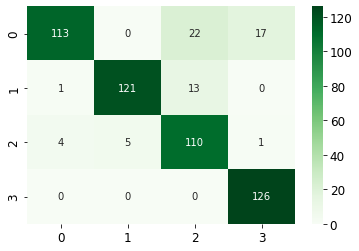

In [11]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test,preds)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(4,4)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [12]:
print(metrics.classification_report(y_test, preds, digits=4))

              precision    recall  f1-score   support

           0     0.9576    0.7434    0.8370       152
           1     0.9603    0.8963    0.9272       135
           2     0.7586    0.9167    0.8302       120
           3     0.8750    1.0000    0.9333       126

    accuracy                         0.8818       533
   macro avg     0.8879    0.8891    0.8819       533
weighted avg     0.8940    0.8818    0.8811       533



Text(0, 0.5, 'PC2')

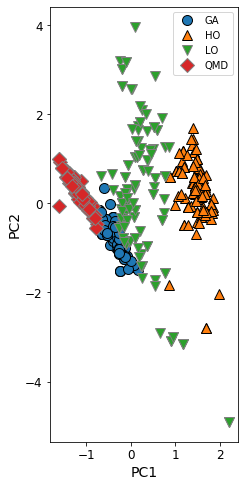

In [13]:
import mglearn

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_test_scaled[:,0], X_test_scaled[:,1], preds)
plt.legend(["GA", "HO", "LO", "QMD"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("PC1")
plt.ylabel("PC2")